# 1. Import

In [212]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
import cv2
import os

# 2. Instantiate Model and Detect

In [213]:
ocr_model = PaddleOCR(lang='en')

[2024/12/02 18:13:26] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\ADMIN/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=

In [214]:
img_path = os.path.join('.\\data_test\\image', '12.jpg')

In [215]:
img_path

'.\\data_test\\image\\12.jpg'

In [216]:
img = cv2.imread(img_path)

In [217]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [218]:
result = ocr_model.ocr(img)

[2024/12/02 18:13:28] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/02 18:13:29] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.20693159103393555
[2024/12/02 18:13:29] ppocr DEBUG: rec_res num  : 1, elapsed : 0.1603858470916748


In [219]:
result

[[[[[592.0, 842.0], [970.0, 842.0], [970.0, 896.0], [592.0, 896.0]],
   ('30H-999.99', 0.9792088270187378)]]]

In [234]:
result[0][0][0]

[[592.0, 842.0], [970.0, 842.0], [970.0, 896.0], [592.0, 896.0]]

In [221]:
[res[0] for res in result[0]]

[[[592.0, 842.0], [970.0, 842.0], [970.0, 896.0], [592.0, 896.0]]]

In [222]:
[res[1][0] for res in result[0]]

['30H-999.99']

In [223]:
[res[1][1] for res in result[0]]

[0.9792088270187378]

# 3. Visualize Results

In [224]:
boxes = [res[0] for res in result[0]]
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

In [225]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [226]:
font_path = "arial.ttf"

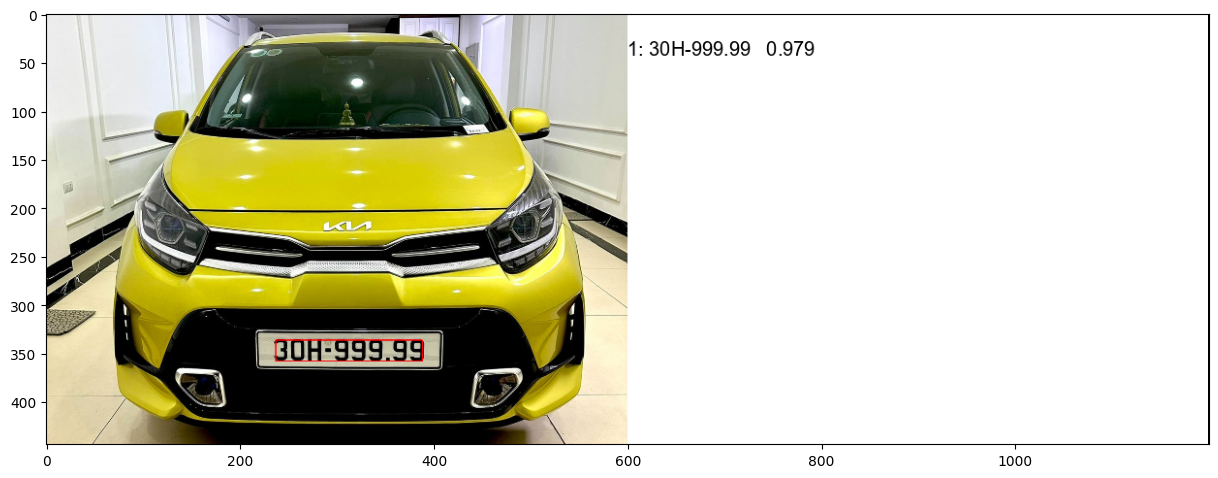

In [227]:
plt.figure(figsize=(15,15))
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path)
plt.imshow(annotated)